# Loading Data

In [1]:
! ls

chexpert-paper-notes.ipynb        initial-exploration.ipynb
config.yml                        kaggle_eda_walkthrough.ipynb
data                              walkthrough-data-processing.ipynb
images


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
path = 'data/'

train_df = pd.read_csv(path + 'CheXpert-v1.0-small/train.csv')
valid_df = pd.read_csv(path + 'CheXpert-v1.0-small/valid.csv')

In [5]:
train_df.head(5)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [6]:
valid_df.head(5)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Missing Data

In [7]:
# define function that returns missing data
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = round((data.isnull().sum()/data.isnull().count()*100), 3).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [8]:
missing_data(train_df)

,Total,Percent
Pleural Other,216922,97.094
Lung Lesion,211470,94.654
Fracture,211220,94.542
No Finding,201033,89.982
Pneumonia,195806,87.643
Enlarged Cardiomediastinum,178575,79.930
Cardiomegaly,177211,79.320
Atelectasis,154971,69.365
Consolidation,152792,68.390
Pneumothorax,144480,64.669


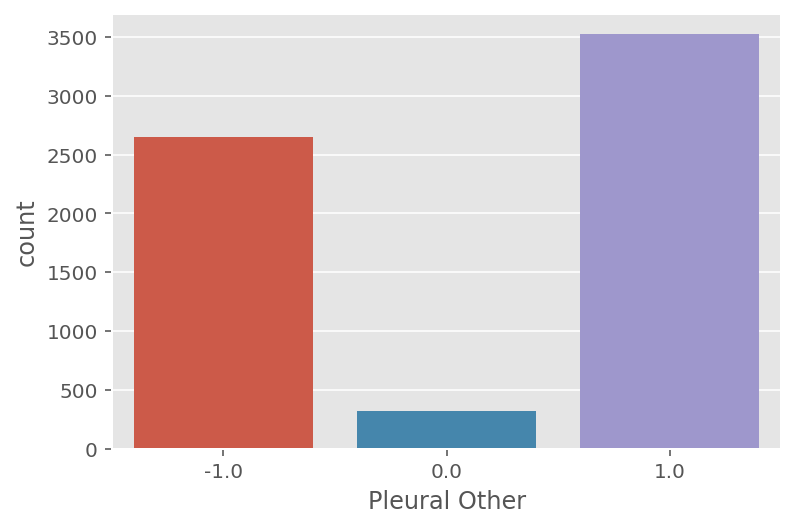

In [9]:
import seaborn as sns

sns.countplot(train_df['Pleural Other']);

In [10]:
missing_data(valid_df)

,Total,Percent
AP/PA,32,13.675
Support Devices,0,0.000
Lung Opacity,0,0.000
Sex,0,0.000
Age,0,0.000
Frontal/Lateral,0,0.000
No Finding,0,0.000
Enlarged Cardiomediastinum,0,0.000
Cardiomegaly,0,0.000
Lung Lesion,0,0.000


# Accessing Images

In [11]:
import os

image_path = path + str(os.listdir(path)).strip('[]').strip("''") + '/'

image_path

'data/CheXpert-v1.0-small/'

In [12]:
train_image_sample_path = os.listdir(image_path + 'train')[:5]

train_image_sample_path

['patient08440',
 'patient63971',
 'patient58330',
 'patient09592',
 'patient57378']

In [13]:
image_train_path = os.listdir(image_path +'/train')
image_test_path = os.listdir(image_path +'/valid')
print("Number of patients in train set:", len(image_train_path),"\nNumber of patients in test set:", len(image_test_path))

Number of patients in train set: 64541 
Number of patients in test set: 201


### Target Features

In [14]:
pathology_targets = list(train_df.columns[5:].values)

pathology_targets

['No Finding',
 'Enlarged Cardiomediastinum',
 'Cardiomegaly',
 'Lung Opacity',
 'Lung Lesion',
 'Edema',
 'Consolidation',
 'Pneumonia',
 'Atelectasis',
 'Pneumothorax',
 'Pleural Effusion',
 'Pleural Other',
 'Fracture',
 'Support Devices']

In [15]:
competition_tasks = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']

competition_tasks

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']

### Uncertainty

The CheXpert paper highlights that there was some uncertainty in regards to some of the labels in the data. There were a few different approaches mentioned but the binary mapping method which maps all instances of uncertainty to either 0 (i.e. _U-Zeroes model_) or all to 1 (i.e. _U-Ones model_)

The primary reason for starting with these two approaches is that it is the easiest to implement. However, I want to point out that the [paper](https://arxiv.org/abs/1901.07031) does mention that this method has the potential for distorting the classifiers, degrading its performance. 

Depending on the results we see down the road, we can follow up with another method called 3-Class Classification, which treats the uncertainty (i.e. __u__) as its own class. This approach is known as the _U-MultiClass_ model and can give the model a way to potentially discover uncertainty on the different pathologies. 

For now though we'll focus on the `competition_tasks` listed above and take the best option between _U-Ones_ and _U-Zeros_ for each of them.

- Atelectasis _U-Ones_
- Cardiomegaly _U-Zeros_
- Consolidation _U-Zeros_
- Edema _U-Ones_
- Pleural Effusion _U-Zeros_

In [16]:
u_one_features = ['Atelectasis', 'Edema']
u_zero_features = ['Cardiomegaly', 'Consolidation', 'Pleural Effusion']
other_features = ['No Finding', 'Enlarged Cardiomediastinum',
                 'Lung Opacity',
                 'Lung Lesion',
                 'Pneumonia',
                 'Pneumothorax',
                 'Pleural Other',
                 'Fracture',
                 'Support Devices']

len(u_one_features + u_zero_features + other_features)

14

### U-One Features

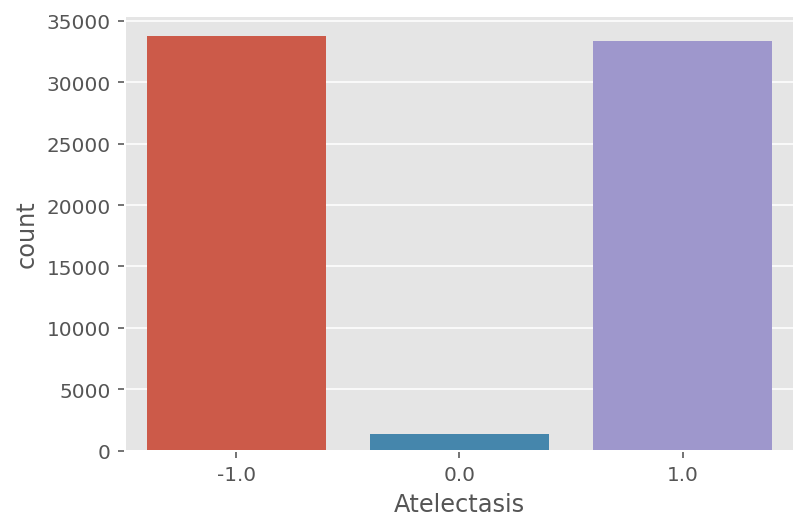

In [18]:
sns.countplot(train_df['Atelectasis']);

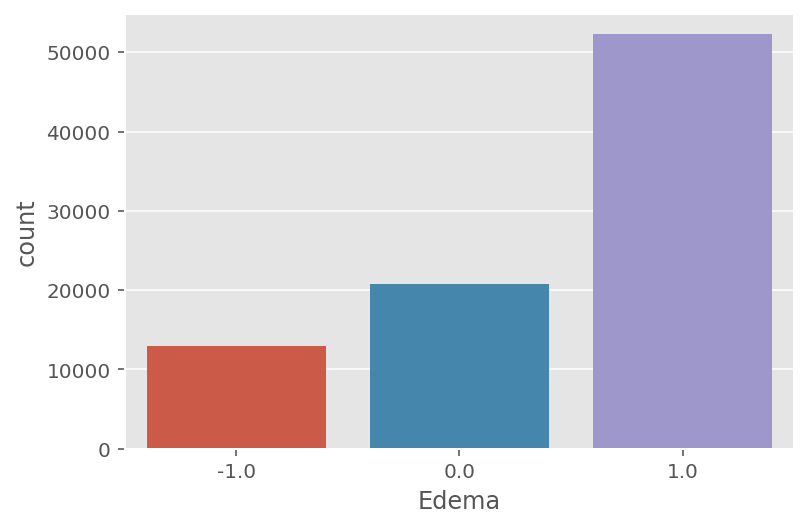

In [19]:
sns.countplot(train_df['Edema']);

### U-Zero Features

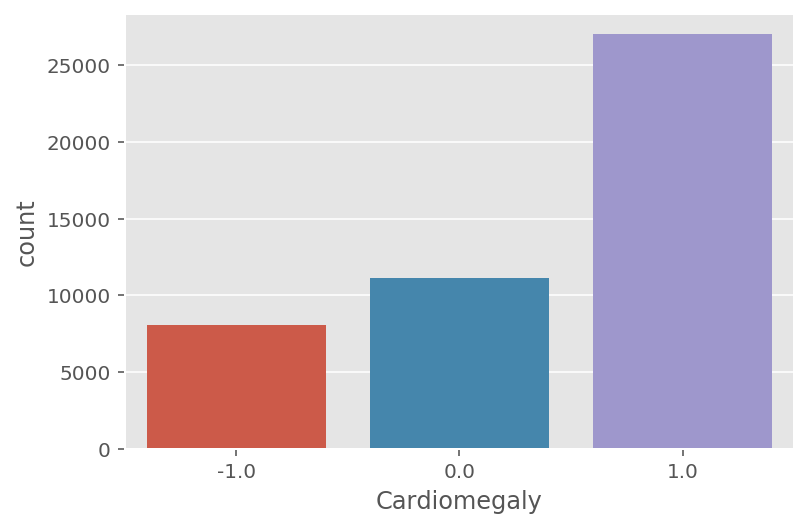

In [20]:
sns.countplot(train_df['Cardiomegaly']);

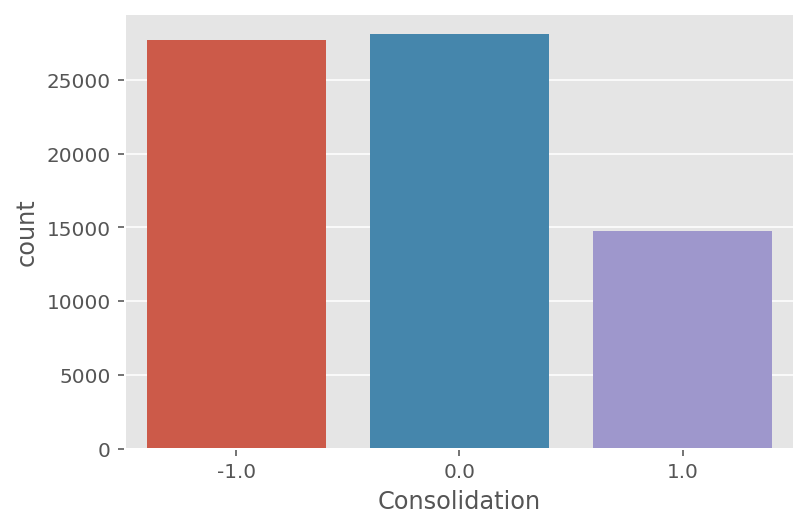

In [21]:
sns.countplot(train_df['Consolidation']);

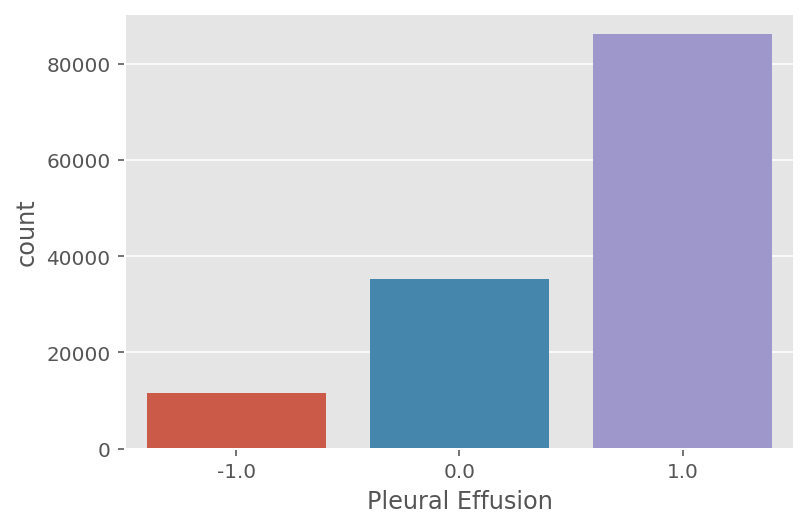

In [22]:
sns.countplot(train_df['Pleural Effusion']);

In [23]:
# add target features string
def feature_string(row):
    feature_list = []
    for feature in u_one_features:
        if row[feature] in [-1,1]:
            feature_list.append(feature)
            
    for feature in u_zero_features:
        if row[feature] == 1:
            feature_list.append(feature)
            
    return ';'.join(feature_list)

In [24]:
# make column indicating if data is from valid set
train_df['train_valid'] = False
valid_df['train_valid'] = True

### Create patient and study columns

Some of the pictures are in folders titled `patient` while other are located in folders titled `study`

In [25]:
# create patient columns
train_df['patient'] = train_df.Path.str.split('/', 3, True)[2]
# create study columns
train_df['study'] = train_df.Path.str.split('/', 4, True)[3]

In [26]:
#create patient column
valid_df['patient'] = valid_df.Path.str.split('/', 3, True)[2]
# create study column
valid_df['study'] = valid_df.Path.str.split('/', 4, True)[3]

In [27]:
full_df = pd.concat([train_df, valid_df])

In [28]:
full_df['feature_string'] = full_df.apply(feature_string, axis = 1).fillna('')

full_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,train_valid,patient,study,feature_string
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,False,patient00001,study1,
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,False,patient00002,study2,Atelectasis;Edema
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,False,patient00002,study1,
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,False,patient00002,study1,
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,False,patient00003,study1,Edema


### Set up sample for faster iteration

In [29]:
def seed_data(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [30]:
def get_sample_df(sample_perc = 0.05):
    
    train_only_df = full_df[~full_df.train_valid]
    valid_only_df = full_df[full_df.train_valid]
    unique_patients = train_only_df.patient.unique()
    mask = np.random.rand(len(unique_patients)) <= sample_perc
    sample_patients = unique_patients[mask]

    sample_df = train_only_df[full_train_df.patient.isin(sample_patients)]
    return pd.concat([sample_df,valid_only_df])

### Set up data set for deep learning

In [31]:
from fastai.vision import *
from torchvision.models import *

In [32]:
src = (ImageList
        .from_df(full_df, path, 'Path')
        .split_from_df('train_valid')
        .label_from_df('feature_string', label_delim=';'))

In [33]:
src

LabelLists;

Train: LabelList (223414 items)
x: ImageList
Image (3, 320, 389),Image (3, 320, 390),Image (3, 320, 390),Image (3, 390, 320),Image (3, 320, 390)
y: MultiCategoryList
,Atelectasis;Edema,,,Edema
Path: data;

Valid: LabelList (234 items)
x: ImageList
Image (3, 320, 390),Image (3, 320, 320),Image (3, 369, 320),Image (3, 320, 390),Image (3, 320, 390)
y: MultiCategoryList
Cardiomegaly,,,Edema,
Path: data;

Test: None

In [34]:
data = (src.transform(get_transforms(do_flip=False), size=124, padding_mode='zeros')
        .databunch(bs=32).normalize(imagenet_stats))

In [40]:
data.c, data.classes

(5,
 ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion'])

In [42]:
data.valid_ds.items[0]

'data/CheXpert-v1.0-small/valid/patient64541/study1/view1_frontal.jpg'

In [43]:
data.show_batch(num_workers=0)

RuntimeError: DataLoader worker (pid 29289) is killed by signal: Unknown signal: 0. 